In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### **Load the dataset**

If you haven't downloaded the flowers dataset, you need to run this code.

In [2]:
# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# # sau khi load xong nhớ đổi tên file nén thành tgz

If you have downloaded the dataset, you just need to run the code below

In [3]:
data_dir = './/datasets//flower_photos' # dành cho nếu tải dataset còn nếu chưa thì xóa dòng này đi

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [4]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [5]:
img_cnt = len(list(data_dir.glob('*/*.jpg')))
print(img_cnt)

3670


Here are some roses:

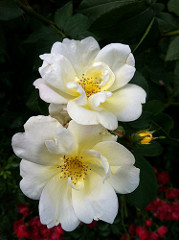

In [6]:
roses = list(data_dir.glob('roses/*.jpg'))
PIL.Image.open(str(roses[0]))

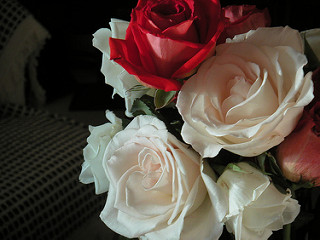

In [7]:
PIL.Image.open(str(roses[1]))

Here are some tulips:

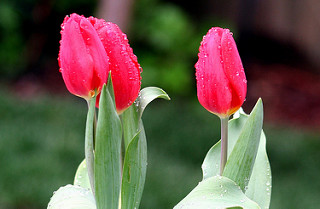

In [8]:
tulips = list(data_dir.glob('tulips/*.jpg'))
PIL.Image.open(tulips[0])

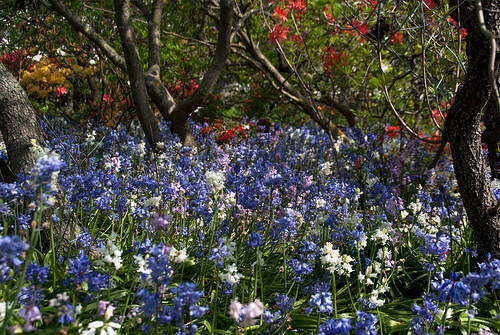

In [9]:
PIL.Image.open(tulips[1])

### **Load data using a Keras utility**

Ý nghĩa của hàm **tf.keras.utils.image_dataset_from_directory**:
Hàm này dùng để tạo các tập dữ liệu TensorFlow từ thư mục chứa ảnh. Nó tự động gắn nhãn (label) cho ảnh dựa trên cấu trúc thư mục. Cụ thể:

- Mỗi thư mục con trong thư mục gốc (data_dir) được coi là một lớp (class).
- Tên thư mục con được sử dụng làm tên của lớp.
- Ảnh trong mỗi thư mục con được gắn nhãn tương ứng với tên của thư mục đó.


##### Create a dataset

Define some parameters for the loader:

In [10]:
img_height = 180
img_width = 180
batch_size = 32 
# ví dụ dataset có 1000 ảnh, training set sẽ chứa 80% ảnh chia thành các batch, mỗi batch chứa 32 ảnh

In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [12]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [13]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


##### Visualize the data

Here are some the first nine images from the training set:

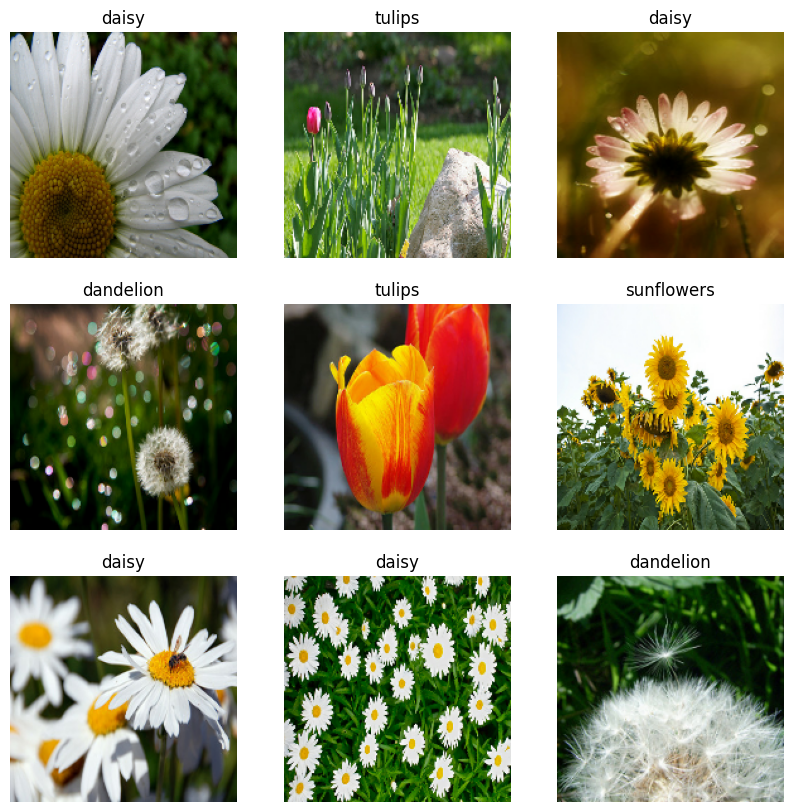

In [14]:
plt.figure(figsize= (10, 10))

for img, labels in train_ds.take(1):  # Lấy 1 batch đầu tiên
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
        

##### Configure the dataset

In [15]:
AUTOTUNE = tf.data.AUTOTUNE 
# nó là 1 tham số tự động điều chỉnh để tối ưu hóa hiệu suất xử lý dữ liệu

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

- prefetch(buffer_size) là 1 method được sử dụng để tải trước các batch dữ liệu trong khi mô hình huấn luyện
- nó cho phép tf chuẩn bị dữ liệu sẵn sàng trong bộ nhớ để mô hình yêu cầu dữ liệu tiếp theo, nó thể xử lý ngay lập tức mà không bị gián đoạn

### **Build model CNN**

In [16]:
num_classes = len(class_names)

model_cnn = Sequential([
    # cnn
    layers.Rescaling(1./255, input_shape = (img_height, img_width, 3)),
    layers.Conv2D(16, kernel_size= (3, 3), padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, kernel_size= (3, 3), padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, kernel_size= (3, 3), padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    
    # dense
    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(num_classes, activation= 'softmax')
])

model_cnn.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

model_cnn.fit(train_ds, validation_data = val_ds, epochs = 10)

Epoch 1/10


d:\Python Download\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 43s 387ms/step - accuracy: 0.3286 - loss: 1.5253 - val_accuracy: 0.5599 - val_loss: 1.0745
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 299ms/step - accuracy: 0.6073 - loss: 1.0097 - val_accuracy: 0.6431 - val_loss: 0.9391
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 195ms/step - accuracy: 0.6923 - loss: 0.8162 - val_accuracy: 0.6730 - val_loss: 0.8942
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 188ms/step - accuracy: 0.7697 - loss: 0.6130 - val_accuracy: 0.6403 - val_loss: 0.9659
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 187ms/step - accuracy: 0.8270 - loss: 0.4713 - val_accuracy: 0.6812 - val_loss: 0.9727
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 22s 244ms/step - accuracy: 0.9081 - loss: 0.2835 - val_accuracy: 0.6567 - val_loss: 1.1357
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 255ms/step - accuracy: 0.9577 - loss: 0.1521 - val_accuracy: 0.6635 - val_loss: 1.4069
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 200ms/step - accuracy: 0.9732 - loss: 0.0949 - val_accuracy: 0.662

**You can see the results, the model is good on training set but not goodd on test set -> this means that the model is overfitting.**

### **Using Data Augmentation to solve the overfitting problem**

##### Set up data augmentation first

In [17]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal',
                      input_shape = (img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

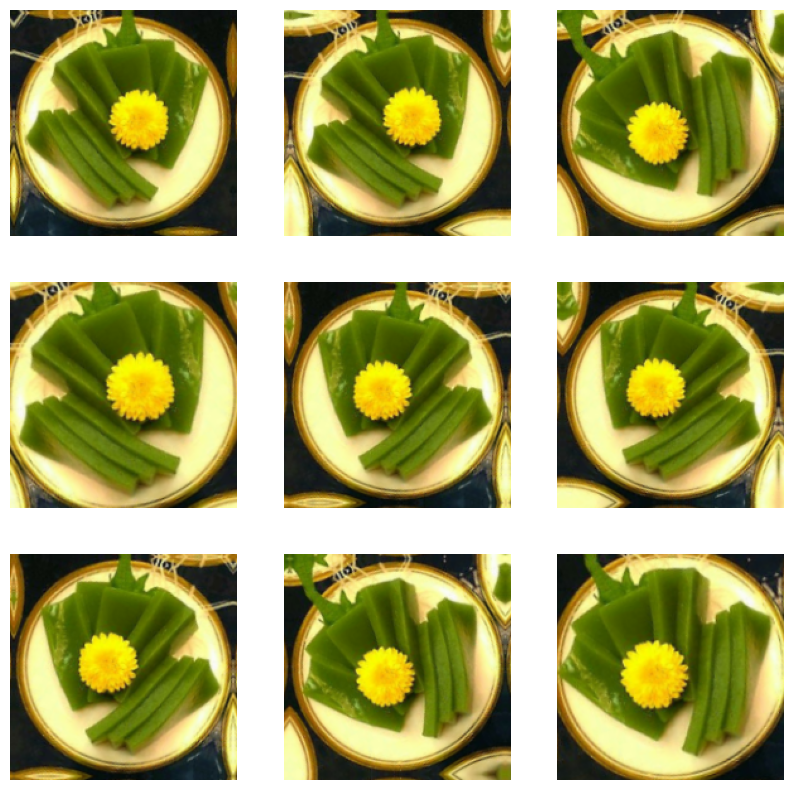

In [18]:
plt.figure(figsize = (10, 10))

for img, labels in train_ds.take(1):
    for i in range(9):
        augmented_img = data_augmentation(img)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_img[1].numpy().astype("uint8"))
        plt.axis("off")

##### Build model using data augmentation

In [19]:
model_data_aug = Sequential([
    # data augmentation
    data_augmentation,
    
    # cnn
    layers.Rescaling(1./255),
    layers.Conv2D(16, kernel_size= (3, 3), padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, kernel_size= (3, 3), padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, kernel_size= (3, 3), padding= 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    
    # dense
    layers.Flatten(),
    layers.Dense(128, activation= 'relu'),
    layers.Dense(num_classes, name = 'outputs')
])

model_data_aug.compile(optimizer = 'adam',
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                       metrics = ['accuracy'])

model_data_aug.fit(train_ds, validation_data = val_ds, epochs= 15)

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 36s 309ms/step - accuracy: 0.3423 - loss: 1.5016 - val_accuracy: 0.5722 - val_loss: 1.0577
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 248ms/step - accuracy: 0.5697 - loss: 1.0651 - val_accuracy: 0.5845 - val_loss: 0.9917
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 252ms/step - accuracy: 0.6434 - loss: 0.9221 - val_accuracy: 0.5736 - val_loss: 1.1017
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 243ms/step - accuracy: 0.6369 - loss: 0.9425 - val_accuracy: 0.6649 - val_loss: 0.8608
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 245ms/step - accuracy: 0.6867 - loss: 0.7972 - val_accuracy: 0.6580 - val_loss: 0.8912
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 260ms/step - accuracy: 0.7048 - loss: 0.7330 - val_accuracy: 0.6975 - val_loss: 0.8751
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 249ms/step - accuracy: 0.7040 - loss: 0.7302 - val_accuracy: 0.6989 - val_loss: 0.7852
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 245ms/step - accuracy: 0.7335 - loss: 0.7026 - val_accu

**You can see the result after using data augmentation and dropout, the accuracy on training set decreased but the accuracy on test set increase and quitely equivalent to the accuracy on training set. This means that the overfitting problem has solved partly**

In [20]:
model_data_aug.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,967,857 (45.65 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,978,572 (30.44 MB)

### **Predict on new data**

In [21]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file("Red_sunflower", origin= sunflower_url, cache_dir= '.')

img = tf.keras.utils.load_img(
    sunflower_path, target_size = (img_height, img_width)
)

117948/117948 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [30]:
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img, 0)
# Chuẩn hóa giá trị của sunflower prediction image về float
img_array = tf.cast(img_array, dtype= tf.float32)

predictions = model_data_aug.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(predictions)
print(score)

print(
    "This image most likely belongs to {} with a {:.2f} percent."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
[[-3.1500213  -1.7813828  -0.44229764  6.471733    0.8265753 ]]
tf.Tensor([6.5951041e-05 2.5918745e-04 9.8894304e-04 9.9516845e-01 3.5175127e-03], shape=(5,), dtype=float32)
This image most likely belongs to sunflowers with a 99.52 percent.


### **Model Deployment**

I will use Tensorflow Lite to save and optimize the model. Tensorflow Lite will help the model Tensorflow run on those small systems like mobile, IoT, edge devices.

In [23]:
# Convert the model to Tensorflow Lite
coverter = tf.lite.TFLiteConverter.from_keras_model(model_data_aug)
tflite_model = coverter.convert()

# Save the model
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\ngmin\AppData\Local\Temp\tmp71rikh4z\assets


INFO:tensorflow:Assets written to: C:\Users\ngmin\AppData\Local\Temp\tmp71rikh4z\assets


Saved artifact at 'C:\Users\ngmin\AppData\Local\Temp\tmp71rikh4z'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='keras_tensor_15')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2929887206992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2929887211600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2929887214864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2929887208336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2929887212944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2929887215440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2929887210256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2929887215248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2929887212752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2929887207952: TensorSpec(shape=(), dtype=tf.resource, name=None)


**Try running the TensorFlow Lite model**

In [24]:
TF_LITE_MODEL_PATH = 'model.tflite' # default path to the saved tensorflow lite model

interpreter = tf.lite.Interpreter(model_path= TF_LITE_MODEL_PATH)

In [25]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['keras_tensor_15'], 'outputs': ['output_0']}}

In [26]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

**Predict some sample flower images**

- Predict red sunflower image

In [31]:
predictions_lite = classify_lite(keras_tensor_15 = img_array)['output_0']
score_lite = tf.nn.softmax(predictions_lite)

print(predictions_lite)
print(score_lite)

print(
    "This image most likely belongs to {} with a {:.2f} percent."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

[[-3.1500218 -1.7813824 -0.4422975  6.471733   0.8265757]]
tf.Tensor([[6.5951041e-05 2.5918745e-04 9.8894304e-04 9.9516845e-01 3.5175146e-03]], shape=(1, 5), dtype=float32)
This image most likely belongs to sunflowers with a 99.52 percent.


- Predict yellow rose image

In [37]:
rose_url = "https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/beautiful-yellow-rose-garry-gay.jpg"
rose_path = tf.keras.utils.get_file("Yellow_rose", origin= rose_url, cache_dir= '.')

140073/140073 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step


In [38]:
# Function to load and normalize flower image to array size
def load_and_normalize_img(img_path, img_h, img_w):
    img = tf.keras.utils.load_img(
        img_path, target_size = (img_h, img_w)
    )
    
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    img_array = tf.cast(img_array, dtype = tf.float32)
    
    return img_array

In [44]:
rose_img = load_and_normalize_img(rose_path, img_height, img_width)

In [45]:
rose_img.shape

TensorShape([1, 180, 180, 3])

In [46]:
def predict_img(model_lite, flower_img_array):
    predictions = model_lite(keras_tensor_15 = flower_img_array)['output_0']
    score = tf.nn.softmax(predictions[0])
    
    print(predictions_lite)
    print(score_lite)

    print(
        "This image most likely belongs to {} with a {:.2f} percent."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

In [47]:
predict_img(classify_lite, rose_img)

[[-3.1500218 -1.7813824 -0.4422975  6.471733   0.8265757]]
tf.Tensor([[6.5951041e-05 2.5918745e-04 9.8894304e-04 9.9516845e-01 3.5175146e-03]], shape=(1, 5), dtype=float32)
This image most likely belongs to daisy with a 70.77 percent.


- Predict pink tulip image

In [48]:
tulip_url = "https://tse4.mm.bing.net/th?id=OIP.Zl1xRBdZ-8X_Jj4ZgWdPUgHaFs&pid=Api&P=0&h=180"
tulip_path = tf.keras.utils.get_file("Pink_tulip", origin= tulip_url, cache_dir= '.')

8954/8954 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [49]:
tulip_img = load_and_normalize_img(tulip_path, img_height, img_width)
tulip_img.shape

TensorShape([1, 180, 180, 3])

In [50]:
predict_img(classify_lite, tulip_img)

[[-3.1500218 -1.7813824 -0.4422975  6.471733   0.8265757]]
tf.Tensor([[6.5951041e-05 2.5918745e-04 9.8894304e-04 9.9516845e-01 3.5175146e-03]], shape=(1, 5), dtype=float32)
This image most likely belongs to tulips with a 88.94 percent.


- Predict white dandelion image

In [52]:
dandelion_url = "https://th.bing.com/th/id/OIP.1X52qoNuOYThlB2J0wN0ygHaEo?rs=1&pid=ImgDetMain"
dandelion_path = tf.keras.utils.get_file("White_dandelion", origin= dandelion_url, cache_dir= '.')

10435/10435 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [53]:
dandelion_img = load_and_normalize_img(dandelion_path, img_height, img_width)
dandelion_img.shape

TensorShape([1, 180, 180, 3])

In [54]:
predict_img(classify_lite, dandelion_img)

[[-3.1500218 -1.7813824 -0.4422975  6.471733   0.8265757]]
tf.Tensor([[6.5951041e-05 2.5918745e-04 9.8894304e-04 9.9516845e-01 3.5175146e-03]], shape=(1, 5), dtype=float32)
This image most likely belongs to dandelion with a 82.95 percent.
